In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from scipy.stats import linregress
from sklearn import datasets

In [2]:
file = "Merged/merged_data.csv"
df = pd.read_csv(file)

df

,Month,GDP (million),Percent GDP,CPI,Percent CPI,Commodity Index,Seasonally adjusted unemployment (%),Owner Occ. Hsing Dbt / Inc,Interest Rates (%pa),Cash Rate (%),AUD/USD exchange rate
0,Jun-1922,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sep-1922,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dec-1922,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mar-1923,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jun-1923,NaN,NaN,2.8,2.3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
401,Sep-2022,553036.0,5.9,128.4,7.3,114.8,3.6,109.1,6.80,2.21,0.6502
402,Dec-2022,555690.0,2.7,130.8,7.8,107.9,3.5,108.8,7.55,3.01,0.6775
403,Mar-2023,NaN,NaN,NaN,NaN,106.2,NaN,NaN,NaN,3.51,0.6712
404,Jun-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Month', 'GDP (million)', 'Percent GDP', 'CPI', 'Percent CPI',
       'Commodity Index', 'Seasonally adjusted unemployment (%)',
       'Owner Occ. Hsing Dbt / Inc', 'Interest Rates (%pa)', 'Cash Rate (%)',
       'AUD/USD exchange rate'],
      dtype='object')

In [4]:
gdp_df = df.loc[:, ["Month", "GDP (million)", "Percent GDP", "Cash Rate (%)"]]
gdp_df

,Month,GDP (million),Percent GDP,Cash Rate (%)
0,Jun-1922,NaN,NaN,NaN
1,Sep-1922,NaN,NaN,NaN
2,Dec-1922,NaN,NaN,NaN
3,Mar-1923,NaN,NaN,NaN
4,Jun-1923,NaN,NaN,NaN
...,...,...,...,...
401,Sep-2022,553036.0,5.9,2.21
402,Dec-2022,555690.0,2.7,3.01
403,Mar-2023,NaN,NaN,3.51
404,Jun-2023,NaN,NaN,NaN


In [5]:
gdp_condition_df = gdp_df.loc[(gdp_df["Cash Rate (%)"] >= 0) & (gdp_df["GDP (million)"] >= 0) & (gdp_df["Percent GDP"] >=0)]
gdp_condition_df

,Month,GDP (million),Percent GDP,Cash Rate (%)
216,Jun-1976,140494.0,2.0,8.02
217,Sep-1976,141630.0,4.0,7.46
218,Dec-1976,142861.0,6.5,6.37
219,Mar-1977,142086.0,1.4,7.58
220,Jun-1977,144099.0,2.6,9.52
...,...,...,...,...
398,Dec-2021,541273.0,4.6,0.04
399,Mar-2022,544364.0,3.0,0.05
400,Jun-2022,549274.0,3.1,0.69
401,Sep-2022,553036.0,5.9,2.21


In [10]:
# GDP in $ '00 billion (hundreds of billion)
gdp_value = gdp_condition_df["GDP (million)"]/100000
gdp_value

216    1.40494
217    1.41630
218    1.42861
219    1.42086
220    1.44099
        ...   
398    5.41273
399    5.44364
400    5.49274
401    5.53036
402    5.55690
Name: GDP (million), Length: 176, dtype: float64

In [11]:
# GDP in % (year-to-year growth)
gdp_rate = gdp_condition_df["Percent GDP"]
gdp_rate

216    2.0
217    4.0
218    6.5
219    1.4
220    2.6
      ... 
398    4.6
399    3.0
400    3.1
401    5.9
402    2.7
Name: Percent GDP, Length: 176, dtype: float64

In [12]:
# Cash rate
cash_rate = gdp_condition_df["Cash Rate (%)"]
cash_rate

216    8.02
217    7.46
218    6.37
219    7.58
220    9.52
       ... 
398    0.04
399    0.05
400    0.69
401    2.21
402    3.01
Name: Cash Rate (%), Length: 176, dtype: float64

In [8]:
x_axis = gdp_condition_df["Month"]
x_axis

216    Jun-1976
217    Sep-1976
218    Dec-1976
219    Mar-1977
220    Jun-1977
         ...   
398    Dec-2021
399    Mar-2022
400    Jun-2022
401    Sep-2022
402    Dec-2022
Name: Month, Length: 176, dtype: object

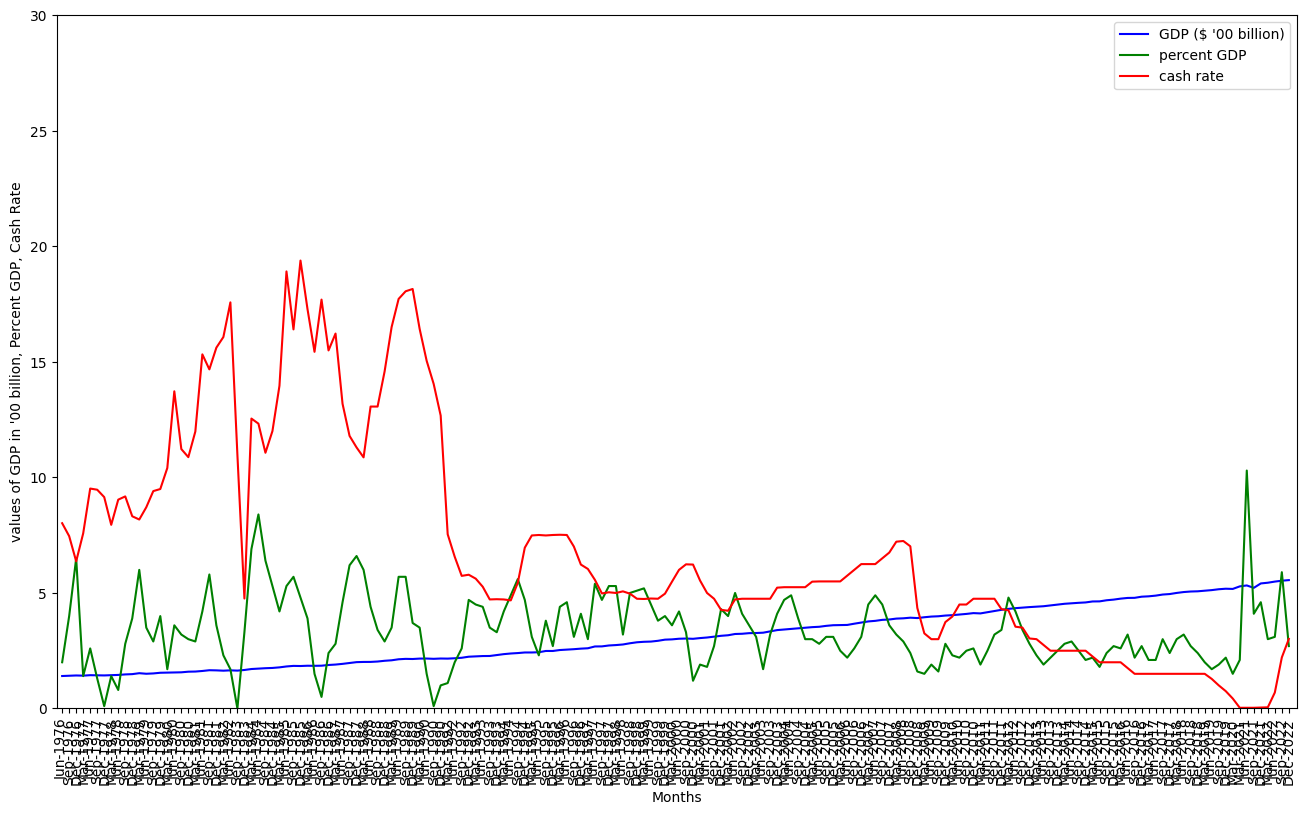

In [13]:
plt.figure(figsize = (16,9))
gdp_val, = plt.plot(x_axis, gdp_value, color = "blue", label = "GDP ($ '00 billion)")
gdp_perc, = plt.plot(x_axis, gdp_rate, color = "green", label = "percent GDP")
cashrate = plt.plot(x_axis, cash_rate,  color = "red", label = "cash rate")
plt.legend(loc="best")
plt.xticks(gdp_condition_df["Month"], rotation="vertical")
plt.xlabel("Months")
plt.ylabel("values of GDP in '00 billion, Percent GDP, Cash Rate")
plt.xlim(-0.75, len(x_axis)+0.15)
plt.ylim(0,30)
plt.savefig("Output/international_condition.png")
plt.show()


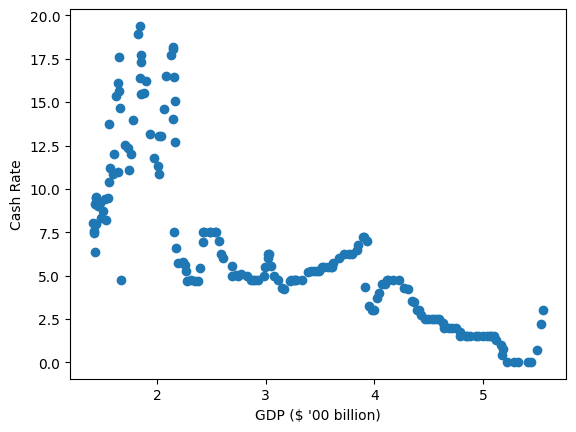

In [14]:
# Cash rate VS GDP $value
plt.scatter(gdp_condition_df.iloc[:,1]/100000, gdp_condition_df.iloc[:,3])
plt.xlabel("GDP ($ '00 billion)")
plt.ylabel("Cash Rate")
plt.show()

In [15]:
# Calculate correlation between Cash rate and GDP $value
gdp_val = gdp_condition_df.iloc[:,1]
cash_rate = gdp_condition_df.iloc[:,3]
correlation = st.pearsonr(gdp_val,cash_rate)
print(f'The corrrelation between GDP value and Cash Rate is {round(correlation[0],2)}')
#The corrrelation between Cash Rate and GDP $value is -0.79

The corrrelation between GDP value and Cash Rate is -0.79


The r-squared is: 0.6192786496983532


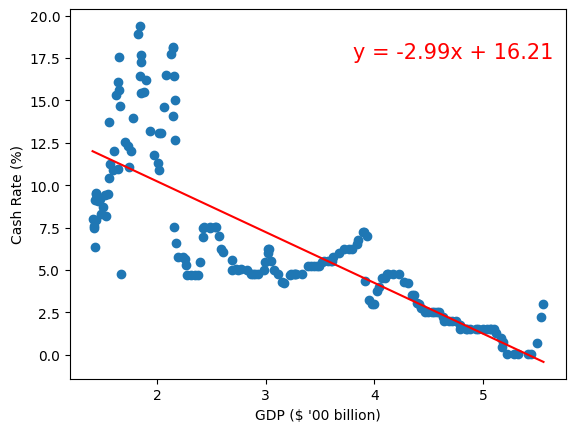

In [19]:
# Print out the r-squared value along with the plot
x_values = gdp_condition_df["GDP (million)"]/100000
y_values = gdp_condition_df["Cash Rate (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3.8,17.5),fontsize = 15, color = "red")
plt.xlabel("GDP ($ '00 billion)")
plt.ylabel("Cash Rate (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# The r-sqaured is: 0.6192786496983532

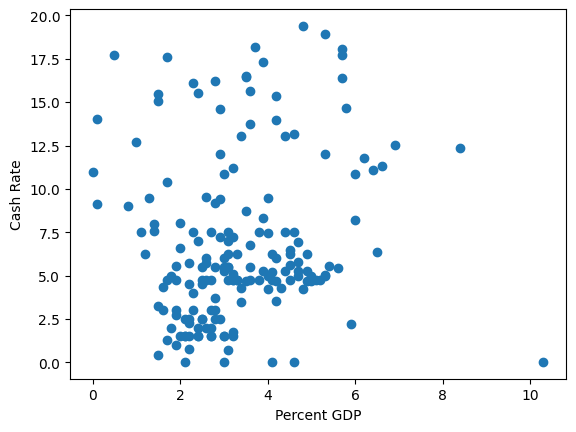

In [20]:
# Cash rate vs % GDP
plt.scatter(gdp_condition_df.iloc[:,2], gdp_condition_df.iloc[:,3])
plt.xlabel('Percent GDP')
plt.ylabel('Cash Rate')
plt.show()

In [21]:
# Calculate correlation between Cash rate and % GDP
percent_gdp = gdp_condition_df.iloc[:,2]
cash_rate = gdp_condition_df.iloc[:,3]
correlation = st.pearsonr(percent_gdp,cash_rate)
print(f'The corrrelation between Percent GDP and Cash Rate is {round(correlation[0],2)}')
#The corrrelation between Percent GDP and Cash Rate is 0.14

The corrrelation between Percent GDP and Cash Rate is 0.14


The r-squared is: 0.019360098089405642


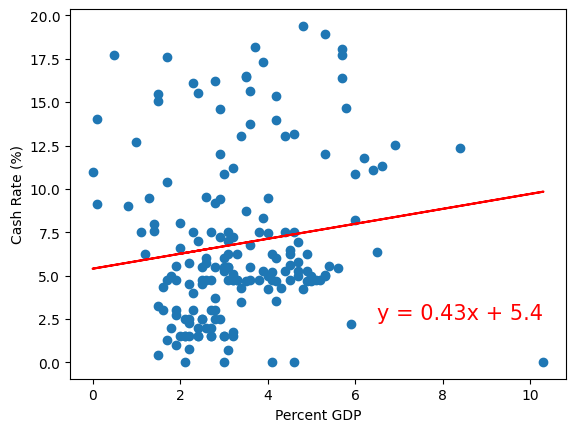

In [22]:
# Print out the r-squared value along with the plot
x_values = gdp_condition_df["Percent GDP"]
y_values = gdp_condition_df["Cash Rate (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6.5,2.5),fontsize = 15, color = "red")
plt.xlabel('Percent GDP')
plt.ylabel('Cash Rate (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
# The r-squared is: 0.019360098089405642